## Millikan electron experiment (Newman Computational Physics, Exc 3.8  p.123 )

The whole source of excitement about the photolectric effect was that it is governed by a very simple equation, whose verification turned out to be very strong evidence that light consists of particles (let's call them photons).


$$
\text{V} = \frac{h}{e} \nu - \Phi
$$

Read this as V (Voltage) = $\frac{h}{e}$ (Planck's Constant divided by the charge) times
$\nu$ (the frequency of the light) minus $\Phi$ (known as the work function of the surface).
So an electron gets kicked up from the surface by a photon, loses a little energy ($\Phi$)
because it takes some work to pry it loose, and then has energy (V) proportional to the
light's wavelength.

The experimental setup was such that the work function of the surface was constant throughout  the experiment.

Here is Millikan's data, measuring the voltage produced by single photons of light
at various frequencies. He won the Nobel Prize for these results, which confirmed
predictions made in Einstein's 1905 work on the photoelectric effect, for which Einstein also
won the Nobel Prize.


In [1]:
import pandas as pd

e_charge = 1.602e-19
df = pd.read_csv("millikan.txt",header=None,delimiter= " ",names=("Frequency","Voltage"))

In [2]:
df

,Frequency,Voltage
0,5.487400e+14,0.53090
1,6.931000e+14,1.08420
2,7.430700e+14,1.27340
3,8.219300e+14,1.65980
4,9.607400e+14,2.19856
5,1.184000e+15,3.10891


1.  The equation says the Frequency and the voltage should be related by a linear relation. Assuming the data do obey this linear relation, use Scikit learn's linear regression implementation to find $\frac{h}{e}$ and $\Phi$ from these data points.  

2.  Then given that the charge of an electron  is $1.602e^{-19}$, estimate Planck's constant. This is one of the most important constants in Physics.  Look it up to see how good your estimate is.  Compute your percentage of error.

3.  Draw a scatter plot of the 6 data points.  Use the results of your linear regression to plot the  line that is the best fit to these points in the same plot.  You will need to make a fairly arbitrary decision about the aspect of the figure (ratio of height to width), since the x and y axis represent different units with very different orders of magnitude.

4.  What is the value of $\Phi$?  Hint:  It's work.  It shouldn't be negative.

In [3]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import linear_model

Xsample = df[["Frequency"]]

Ysample = df[["Voltage"]]# income_train[["median_house_value"]]

lin1 = linear_model.LinearRegression()

lin1.fit(Xsample,Ysample)

#e_charge x h_over_e = h
h_over_e = lin1.coef_[0,0]
plancks_c_est = h_over_e * e_charge

plancks_c = 6.62607015e-34
err = (plancks_c - plancks_c_est)/plancks_c
print(f"{plancks_c_est=}      {err=:.2%}")
print(f"Phi = {-lin1.intercept_[0]:.4f}"  )

plancks_c_est=6.549340228345049e-34      err=1.16%
Phi = 1.7312


And [Wikipedia](https://en.wikipedia.org/wiki/Planck_constant) gives the value of Planck's Constant as

$$
6.62607015×10^{−34}\, \text{joule}/\text{hertz}
$$

Planck's constant had independently been computed from other work.  This level of agreement was strong evidence that the equation was right.

The plot below is the first thing Millikan was looking for.  Is there an underlying linear relation in the data?
Yes.

Text(0, 0.5, 'Voltage')

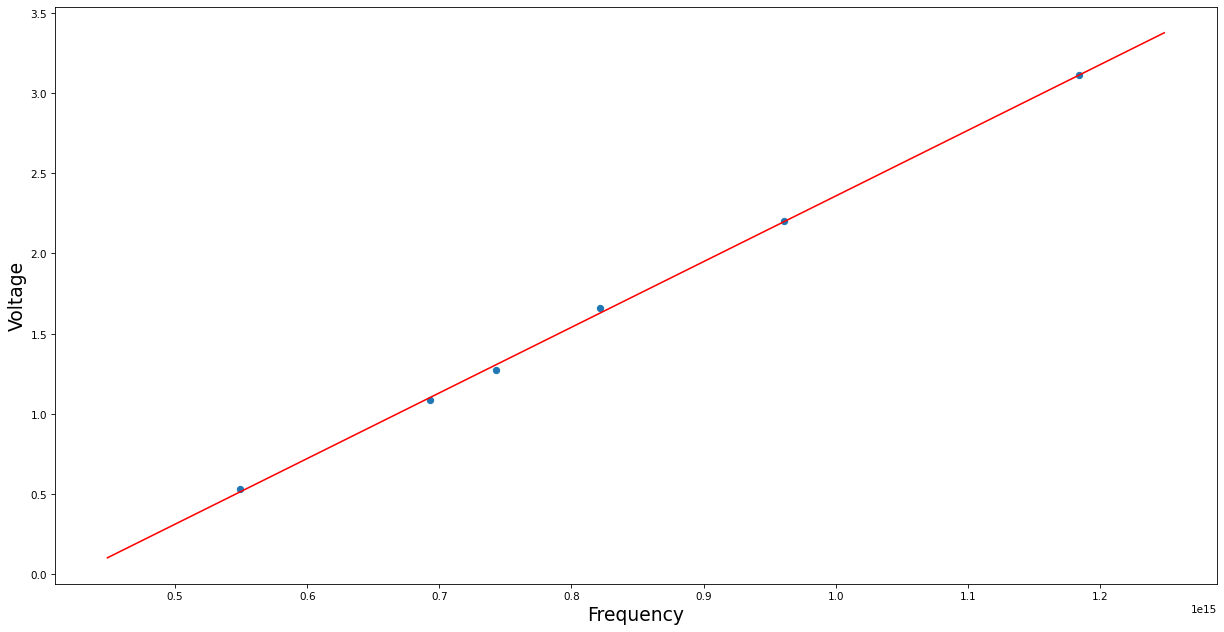

In [4]:
import numpy as np

from matplotlib import pyplot as plt
width=10
fig, ax = plt.subplots(1,1,figsize=(2*width, width), dpi=75,frameon=False)
ax.scatter(Xsample,Ysample)
delta = 1e14
x = np.arange(Xsample.values.min()-delta,Xsample.values.max()+delta,1e14)
b,m = lin1.intercept_[0],lin1.coef_[0,0]
ax.plot(x,(m*x)+b,c="r")
ax.set_xlabel("Frequency",fontsize=18)
ax.set_ylabel("Voltage",fontsize=18)

In [5]:
#Freq of green light 540 THz
f = 540*10**12
##  Energy of one green photon per E = hf
print(f"{plancks_c*f:.4e} Joules")

3.5781e-19 Joules


Conclusion: Don't be too worried about getting struck by a photon of green light.  It won't hurt.

## 1985 Auto Imports Database  Exercise  (Regression)


UCI Data sets

Schlimmer, J. (1985). Automobile Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.

-- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
-- Date: 19 May 1987
-- Sources:

     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038 
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037


This exercise involves a technique called **cross-validation**: k-fold cross-validation means
that you do k different train test splits, each time using a different portion of the data for the
test set.  The way this typically works is that by the end of the k splits, each item in the dataset
has had a chance to be in the test set (that's the way the scikit_learn `KFold` function works).
Intuitively this means that if there are items in the data that are particularly hard, the learner will
get a crack at predicting those items without having seen them during training. 

Here is how cross validation on a small dataset of size 7 works if we require there to 
be 7 splits:

In [1]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6],[7,5]])
y = np.array([1, 2, 1, 2, 1, 2, 2])
rs = KFold(n_splits=7)


for i, (train_index, test_index) in enumerate(rs.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 2 3 4 5 6]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2 3 4 5 6]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1 3 4 5 6]
  Test:  index=[2]
Fold 3:
  Train: index=[0 1 2 4 5 6]
  Test:  index=[3]
Fold 4:
  Train: index=[0 1 2 3 5 6]
  Test:  index=[4]
Fold 5:
  Train: index=[0 1 2 3 4 6]
  Test:  index=[5]
Fold 6:
  Train: index=[0 1 2 3 4 5]
  Test:  index=[6]


**General idea of the assignment: Reproduce the regression result from Kibler et al.**

Kibler, D., Aha, D. W., & Albert, M. (1989).  Instance-based prediction of real-valued attributes.  *Computational Intelligence 5* pp.  51--57.
	
**Predicted price of car using all Numeric and Boolean attributes.**

Their Method: an instance-based learning (IBL) algorithm derived from a localized k-nearest neighbor algorithm. You won't build the IBL system.  You will just implement the system they  compared it with: a standard  linear regression model. Note that they discarded all instances with missing attribute values.  You should do the same.  This resulted in a training set of 159 instances.

The Idea: Train 159 models. In each case, train with 158 instances.  Predict the price of  the  159th instance and save that in an array called `predictions`.  Each time you train,. a different row of the data should be held out. to be used as test data; scikit learn's KFold should help.


Results: 

Percent Average Deviation Error, also known as MAPE ("mean absolute percentage error")  of Prediction from Actual

1. 11.84% for the IBL algorithm
2. 14.12% for the resulting linear regression equation

#### Attribute information

 1. symboling:                -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:        continuous from 65 to 256.
3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                           isuzu, jaguar, mazda, mercedes-benz, mercury,
                           mitsubishi, nissan, peugot, plymouth, porsche,
                           renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type:                diesel, gas.
5. aspiration:               std, turbo.
6. num-of-doors:             four, two.
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd.
9. engine-location:          front, rear.
10. wheel-base:               continuous from 86.6 120.9.
11. length:                   continuous from 141.1 to 208.1.
12. width:                    continuous from 60.3 to 72.3.
13. height:                   continuous from 47.8 to 59.8.
14. curb-weight:              continuous from 1488 to 4066.
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
17. engine-size:              continuous from 61 to 326.
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:                     continuous from 2.54 to 3.94.
20. stroke:                   continuous from 2.07 to 4.17.
21. compression-ratio:        continuous from 7 to 23.
22. horsepower:               continuous from 48 to 288.
23. peak-rpm:                 continuous from 4150 to 6600.
24. city-mpg:                 continuous from 13 to 49.
25. highway-mpg:              continuous from 16 to 54.
26. price:                    continuous from 5118 to 45400.

#### Missing values info

Missing values are denoted by '?'. 


#### Loading the data

In [16]:
import pandas as pd


#import os
#print(os.getcwd())



cols = "symboling normalized-losses make fuel-type aspiration num-of-doors body-style" +\
       " drive-wheels engine-location wheel-base length width height curb-weight" +\
       " engine-type num-of-cylinders engine-size fuel-system bore stroke" +\
       " compression-ratio horsepower peak-rpm city-mpg highway-mpg price"
cols = cols.split()

df = pd.read_csv("data/automobile/imports-85.data",sep=",",header=None,names=cols
                )

#### Instructions

Build a regression model predict car price from other numeric and Boolean variables.  Here are some specific things to do:

Grading rubric 7 points total.

The first 5 items are worth  5 points.

Item 6:  Discretionary no deduction except for silly answers
Item 7:  High ranking positive  and negative features and doesnt-matter feature.  1 pt
Item 8:  Baseline model 1 pt

1.  Select the Numeric and Boolean attributes you will use.  Note that the data types  you get when you read in the data are inferred by pandas and they may not be correct. Think about whether the data types pandas uses for each column are appropriate for the information being represented in that column.  Also note: There are obviously no Boolean data types directly represented in the data, but you can create some Boolean type columns using `.str.get_dummies()`. For example, try executing `df["body-style"].str.get_dummies()`.  This returns a Dataframe with the Boolean columns derived from the categorial `"body_style"` column. You use `pd.merge` to merge these new columns into `df`.
2.  Do any data type conversions you need to do to use the attributes sensibly.  Note:
    One of the best ways to do your type conversions is to do them while
    reading in the data with `read_csv` (called above).  It is recommended that you 
    read the docs for function by googling "pandas read_csv".
3.  Discard instances with missing values. Note that missing values are denoted by 
    '?', not a convention known to pandas.   Again "read_csv" can help.
4.  Build a linear regression model to predict price. Since you are trying to reproduce 
    Kibler at al. you must do the training/test splits the way they do: Use all but one 
    row of data for training on each train-test split, with the held out row
    used as test data. Do N train-test splits where N is the number of rows. A different
    row should be held out each time (so you can't choose the held out row by random
    selection).
5.  Evaluation.  Compute root mean squared error.  Also compute Average 
    Deviation Error of Prediction from Actual (for comparison with Kibler et al.)  You can 
    use scikit_learn's `mean_absolute_percentage_error` for this.  Please pay attention to 
    the right argument order.  Call the 1D array of the predictions you made during your 
    159 train-test splits `predictions`. Conceptually, `predictions` and `df["price"]` are 
    the arguments of `mean_absolute_percentage_error` (MAPE) and 
    `root_mean_squared_error` (RSME).  Note You should be able to build a linear regression
    model that beats the 14.12% MAPE score for a regression model reported by
    Kibler et al.
6.  Try different feature sets. Is it sometimes a good idea to leave a feature out? 
    Yes! Report the results for your best model.  Note: you don't have to and should not
    try all possible subsets of the columns of `df`.  Just try a model with all possible
    numerical and Boolean columns as features and then look at ways to improve it by
    pruning some columns/features.  You don't have to show all your experiments.
    Just your best model. The code that produced it.  And the MAPE and RSME
    scores for 159 predictions you made with that model (one model, two numbers).
7.  For your best model report your most important positive feature (most likely to inflate price) and your
    most important negative feature (most likely to lower price). Find the 5 features that matter the least
    in determining price.
8.  To help you interpret your results, implement and evaluate a baseline model 
    for comparison.  The baseline should always predict
    the mean price of the entire data set.  Find
    the MAPE and RSME for the baseline model.  How does the RSME of this baseline model
    compare with the STD of the price column?
9.  Optionally, try out sklearn's `linear_model.LogisticRegression` on the problem.  
    To do this you   will need to scale the data using sklearn's
    `preprocessing.StandardScaler`. Read [the 
    docs](https://scikit-learn.org/1.5/modules/preprocessing.html) 
    because this is implemented as an sklearn Transformer.  What effect does using 
    Logistic Regression have?

Data types as read in by `read_csv`.  Recall that columns containing strings 
will by default be given the data type `object`.

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-types       205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

A look at the regression variable:

In [313]:
df["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

## Solution

Some things are best done by making use of some of the bells and whistles in
`read_csv`.

In [21]:
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn import linear_model


# Turn columns with number-words (strings) into columns with data type int.
# Choice:  Do this rather than treat them as categorical because they likely
# bear a linear relation to price: e.g., more doors, more expensive; ditto for more cylinders
num_list = "one two three four five six seven eight nine ten eleven twelve".split()
num_dict = {num:(i+1) for (i,num) in enumerate(num_list)}
num_dict["?"] = np.NaN

def word2int (wd):
    return num_dict[wd]

# na_values: The dataset uses "?" for missing values but pandas doesnt recognize that among
# its default ways of indicating missing values
df = pd.read_csv("data/automobile/imports-85.data",sep=",",header=None,names=cols,
                  na_values=("?", ),
                  converters={"num-of-cylinders":word2int,
                             "num-of-doors":word2int},
                                              )
print(len(df))
print(len(df.dropna()))
df = df.dropna()
Y = df[df.columns[-1]]
df = df[df.columns[:-1]]
##  This set of features performs quite well.
##  It beats the 14.12% MAPE score reported by Kibler et al.
## Omit some feats, factor out all boolean columns.
df2 = df[[#'symboling', 
          'normalized-losses', # 'make', 
          'num-of-doors', #'body-style', 
          'wheel-base', 'length', 'width', 'height', 'curb-weight', #'engine-types', 
          'num-of-cylinders', 'engine-size', #'fuel-system',
          'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
          'city-mpg', 
          'highway-mpg'
]]

aspiration_data = df["aspiration"].str.get_dummies()
fuel_type_data = df["fuel-type"].str.get_dummies()
drive_wheels_data = df["drive-wheels"].str.get_dummies()
body_style_data = df["body-style"].str.get_dummies()
engine_type_data = df["engine-type"].str.get_dummies()
make_data = df["make"].str.get_dummies()
df3=df2
# These dont seem to help.
#df3 = pd.merge(left=df3, right=aspiration_data,left_index=True,right_index=True)
#df3 = pd.merge(left=df3, right=fuel_type_data,left_index=True,right_index=True)
df3 = pd.merge(left=df3, right=make_data,left_index=True,right_index=True)
df3 = pd.merge(left=df3, right=body_style_data,left_index=True,right_index=True)
df3 = pd.merge(left=df3, right=drive_wheels_data,left_index=True,right_index=True)

205
159


In [22]:
#best model mapes score 0.1123066275942463
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  159 non-null    float64
 1   num-of-doors       159 non-null    float64
 2   wheel-base         159 non-null    float64
 3   length             159 non-null    float64
 4   width              159 non-null    float64
 5   height             159 non-null    float64
 6   curb-weight        159 non-null    int64  
 7   num-of-cylinders   159 non-null    int64  
 8   engine-size        159 non-null    int64  
 9   bore               159 non-null    float64
 10  stroke             159 non-null    float64
 11  compression-ratio  159 non-null    float64
 12  horsepower         159 non-null    float64
 13  peak-rpm           159 non-null    float64
 14  city-mpg           159 non-null    int64  
 15  highway-mpg        159 non-null    int64  
 16  audi               159 non-null

Note:

In [9]:
df["engine-location"].unique()

array(['front'], dtype=object)

#### best model: mapes score 11.23%

In [35]:
from sklearn import preprocessing

def train_and_eval_model_kfold(df3,Y,scale=False):
    # NB This version allows optional scaling of data
    N = len(df3)
    predictions = np.zeros((N,))
    rs = KFold(n_splits=N)
    for (i,(idxs, test_index)) in enumerate(rs.split(df3)):
        test_index = test_index[0]
        lin1 = linear_model.LinearRegression()
        if scale:
            scaler = preprocessing.StandardScaler()
            X_train = scaler.fit_transform(df3.iloc[idxs])
        else:
            X_train = df3.iloc[idxs]#scaler.fit_transform(df3.iloc[idxs])
        lin1.fit(X_train,Y.iloc[idxs])
        if scale:
            predictions[i] = lin1.predict(scaler.transform(df3.iloc[test_index:test_index+1]))[0]
        else:
            predictions[i] = lin1.predict(df3.iloc[test_index:test_index+1])[0]
    mape = mean_absolute_percentage_error(Y, predictions)
    rmse = root_mean_squared_error(Y, predictions)
    # lin1 is just the last learner trained
    return mape,rmse,lin1 

mape,rmse,lin1 = train_and_eval_model_kfold(df3,Y)

print(f"MAPE: {mape:.2%}   RMSE: {rmse:,.2f}   Y STD: {Y.std(ddof=0):,.2f}")

#mapes_log,rmse_scores_log = train_and_eval_model(df3,Y,use_logistic=True)

#print(f"MAPES: {mapes_log.mean():.3f} RMSE: {rmse_scores_log.mean():,.3f}")
#prev best
#MAPES: 0.112   RMSE: 1,273.16   Y STD: 5,877.86

MAPE: 11.23%   RMSE: 1,826.42   Y STD: 5,859.34


Here's an alternative idea about how to return a range of indices excluding one:

In [10]:
# indices from 0 to 10 inclsive excluding 7
i,N = 7,11
idxs = list(range(i)) + list(range(i+1,N))
idxs

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10]

In [27]:

def train_and_eval_model(df3,Y):
    """
    Use all but one row of data for  training
    on each train-test split, with the held out row
    used as test data.
    
    A consequence of this kind of cross-validation
    is that we cant use R2 score for evaluation
    because R2 score isn't valid for test sets of 2 or fewer.
    """
    N = len(df3)
    predictions = np.zeros((N,))
    for i in range(len(df3)):
        idxs = list(range(i)) + list(range(i+1,N))
        lin1 = linear_model.LinearRegression()
        lin1.fit(df3.iloc[idxs],Y.iloc[idxs])
        predictions[i] = lin1.predict(df3.iloc[i:i+1])[0]
    mape = mean_absolute_percentage_error(Y, predictions)
    rmse = root_mean_squared_error(Y, predictions)
    # lin1 is just the last learner trained
    return mape,rmse,lin1

mape,rmse,lin1 = train_and_eval_model(df3,Y)

print(f"MAPE: {mape:.2%}   RMSE: {rmse:,.2f}   Y STD: {Y.std(ddof=0):,.2f}")

MAPE: 11.23%   RMSE: 1,826.42   Y STD: 5,859.34


Thre logistic regression model was not as good for this problem and feature set, accrodin to both
RMSE and MAPE.

In [12]:
from sklearn import preprocessing

def train_and_eval_logistic_model(df3,Y):
    """
    Use all but one row of data for  training
    on each train-test split, with the held out row
    used as test data.
    
    A consequence of this kind of cross-validation
    is that we cant use R2 score for evaluation
    because R2 score isn't valid for test sets of 2 or fewer.
    """
    N = len(df3)
    predictions = np.zeros((N,))
    for i in range(len(df3)):
        idxs = list(range(i)) + list(range(i+1,N))
        scaler = preprocessing.StandardScaler()
        X_train_scaled = scaler.fit_transform(df3.iloc[idxs])
        lin_log = linear_model.LogisticRegression()
        lin_log.fit(X_train_scaled,Y.iloc[idxs])
        X_test_scaled = scaler.transform(df3.iloc[i:i+1])
        predictions[i] = lin_log.predict(X_test_scaled)[0]
    mape = mean_absolute_percentage_error(Y, predictions)
    rmse = root_mean_squared_error(Y, predictions)
    # This lin is just the last one trained.
    return mape,rmse,lin_log

mape_log,rmse_log,lin_log = train_and_eval_logistic_model(df3,Y)

# orig MAPES: 0.172 RMSE: 2,128.434
print(f"MAPE: {mape_log:.2%} RMSE: {rmse_log:,.3f}")

MAPE: 17.25% RMSE: 3,437.654


For estavlishing a baseline for these nmbers, we evaluate the always,
predict the mean value model.

In [13]:
def eval_base_model(df3, Y,use_Y_mean=False):
    """
    Use all but one row of data for  training
    on each train-test split, with the held out row
    used as test data.
    
    A consequence of this kind of cross-validation
    is that we cant use R2 score for evaluation
    because R2 score isn't valid for test sets of 2 or fewer.
    """
    global predictions
    N = len(df3)
    if use_Y_mean:
        Y_mean = Y.mean()
        predictions = Y_mean * np.ones((N,))
    else:
        predictions = np.zeros((N,))
        for i in range(len(df3)):
            idxs = list(range(i)) + list(range(i+1,N))
            Y_train = Y.iloc[idxs]
            predictions[i] = Y_train.mean()
    mape = mean_absolute_percentage_error(Y, predictions)
    rmse = root_mean_squared_error(Y, predictions)
    return mape,rmse

mape_base,rmse_base = eval_base_model(df3,Y,use_Y_mean=True)

#Y.std: `ddof=0`  normalizes by N, ddof=1 (the default) by N-1:
print(f"MAPES: {mape_base:.2%} RMSE: {rmse_base:,.3f} Y STD: {Y.std(ddof=0):,.2f}")

MAPES: 43.40% RMSE: 5,859.343 Y STD: 5,859.34


Note computing the RMSE for a model that always predicts the mean is
the same as computing the STD.

Note the best model uses 1-hot encoding of the `make` column. That makes
a huge difference.  Hence we have
the following results for most significant positively weighted and 
most significant negatively weighted feature:

Most important positive feature:

In [14]:
df3.columns[lin1.coef_.argmax()]

'jaguar'

Most important negative feature:

In [15]:
df3.columns[lin1.coef_.argmin()]

'mitsubishi'

Importance of features from lowest to highest.  The most important positive feature that isn't a make is `convertible`.  The most important negative feature that isn't a make is `hardtop`.  It is possible to  improve the model further by examining
these feature-rankings and looking for features to leave out.  But the improvements
I found are pretty tiny.

In [16]:
df3.columns[lin1.coef_.argsort()]

Index(['mitsubishi', 'subaru', 'plymouth', 'toyota', 'dodge', 'peugot',
       'volkswagen', 'nissan', 'chevrolet', 'mazda', 'hardtop', 'hatchback',
       'wagon', 'sedan', 'honda', 'fwd', 'bore', 'stroke', 'height', 'volvo',
       'city-mpg', 'engine-size', 'length', '4wd', 'peak-rpm', 'curb-weight',
       'normalized-losses', 'highway-mpg', 'horsepower', 'compression-ratio',
       'width', 'wheel-base', 'num-of-doors', 'rwd', 'saab',
       'num-of-cylinders', 'audi', 'bmw', 'convertible', 'porsche',
       'mercedes-benz', 'jaguar'],
      dtype='object')

Find the five features that matter the least:

In [17]:
df3.columns[np.abs(lin1.coef_).argsort()][:5]

Index(['peak-rpm', 'curb-weight', 'normalized-losses', 'highway-mpg', '4wd'], dtype='object')

Best linear regression model minus one-hot encoding of make column:

In [18]:
df4=df2
#df3 = pd.merge(left=df3, right=make_data,left_index=True,right_index=True)
df4 = pd.merge(left=df4, right=body_style_data,left_index=True,right_index=True)
df4 = pd.merge(left=df4, right=drive_wheels_data,left_index=True,right_index=True)
mape1,rmse1,_ = train_and_eval_model(df4,Y)

print(f"MAPE: {mape1:.3f} RMSE: {rmse1:,.3f}")

MAPE: 0.158 RMSE: 2,713.800


Ditto for logistic regression:

In [20]:
mape2,rmse2,lin_log2 = train_and_eval_logistic_model(df4,Y)
print(f"LMAPE: {mape2:.3f} LRMSE: {rmse2:,.3f}")

LMAPE: 0.166 LRMSE: 3,626.962


Interesting and puzzling reult.  The logistic model's LMAP got **better** without the
make features, although the RMSE got worse.

In [3]:
import numpy as np
A = np.arange(24).reshape((4,6))
A.sum(axis=0)

array([36, 40, 44, 48, 52, 56])